# Neural Network Forest Fire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#loading the dataset
dataset=pd.read_csv("forestfires.csv")
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
dataset.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [12]:
# As we can see dummy variables are already created, we will drop the columns month and day
data = dataset.drop(["month", "day"], axis = 1)

In [13]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [14]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# VISUALIZATION

<AxesSubplot:>

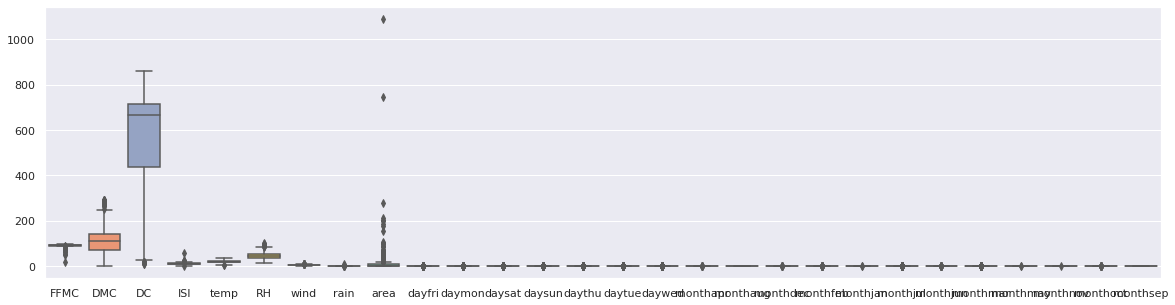

In [15]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=data, orient="v", palette="Set2") 
#There are outliers in the case of area. But we cannot discard it

<AxesSubplot:xlabel='area', ylabel='Density'>

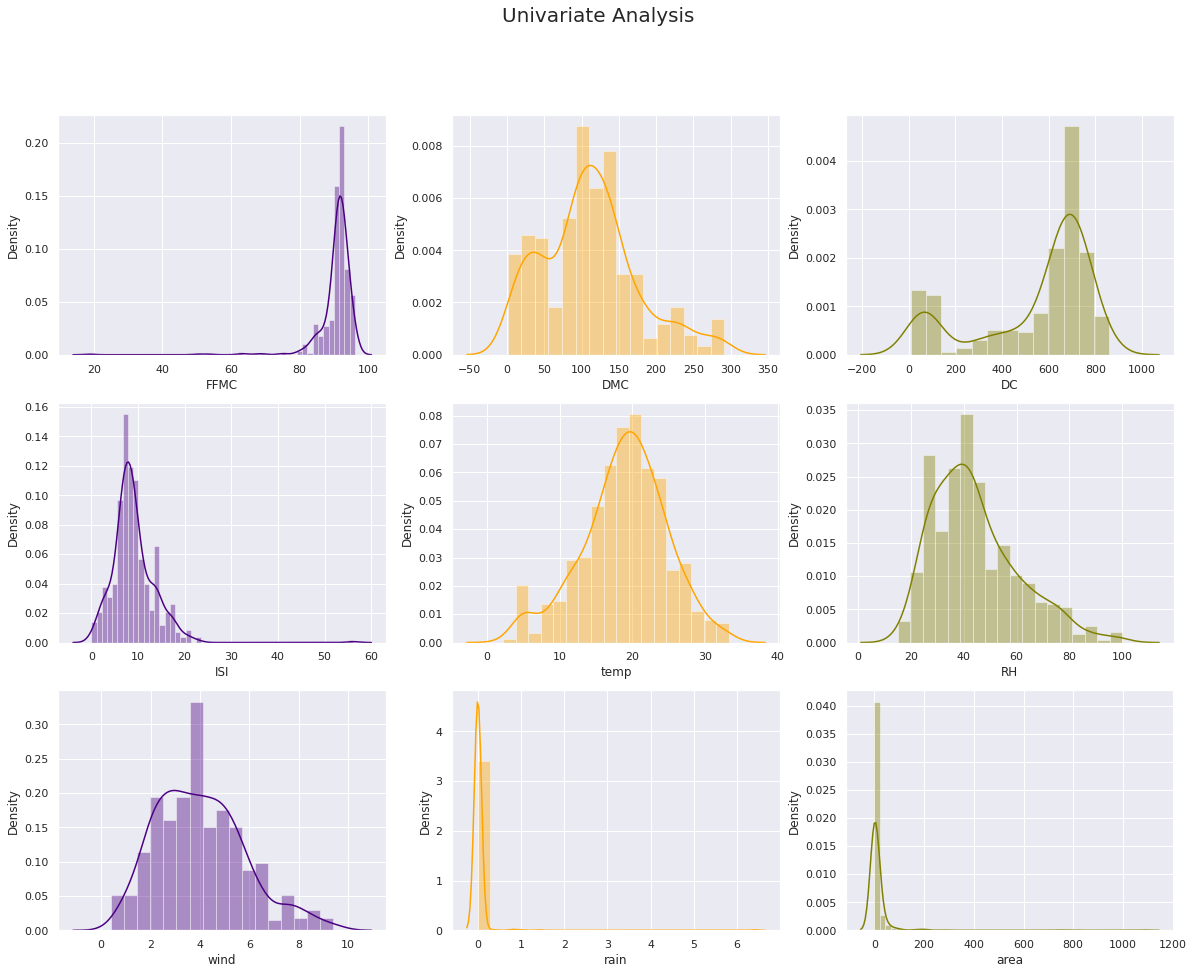

In [16]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(data['FFMC'],ax=axes[0,0],color='indigo')
sns.distplot(data['DMC'],ax=axes[0,1],color='orange')
sns.distplot(data['DC'],ax=axes[0,2],color='olive')
sns.distplot(data['ISI'],ax=axes[1,0],color='indigo')
sns.distplot(data['temp'],ax=axes[1,1],color='orange')
sns.distplot(data['RH'],ax=axes[1,2],color='olive')
sns.distplot(data['wind'],ax=axes[2,0],color='indigo')
sns.distplot(data['rain'],ax=axes[2,1],color='orange')
sns.distplot(data['area'],ax=axes[2,2],color='olive')

In [17]:
# Normalizing the data
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
data.loc[data["size_category"] == 'small', 'size_category'] = 0
data.loc[data["size_category"] == 'large', 'size_category'] = 1

In [19]:
data.size_category.value_counts()

0    378
1    139
Name: size_category, dtype: int64

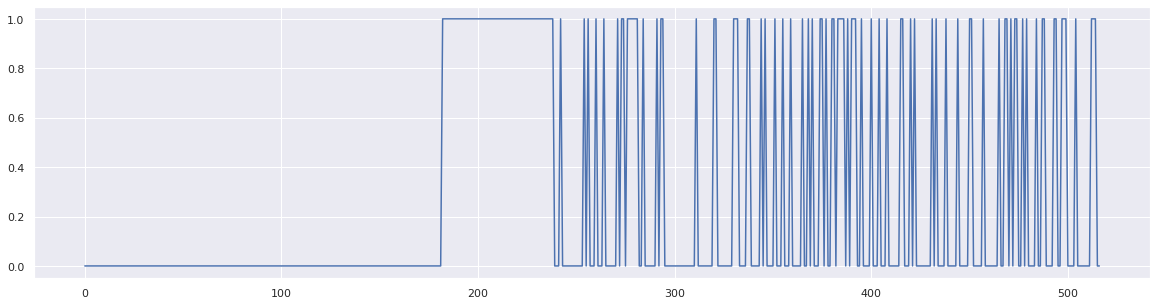

In [20]:
plt.plot(data.size_category)

<AxesSubplot:xlabel='size_category', ylabel='Density'>

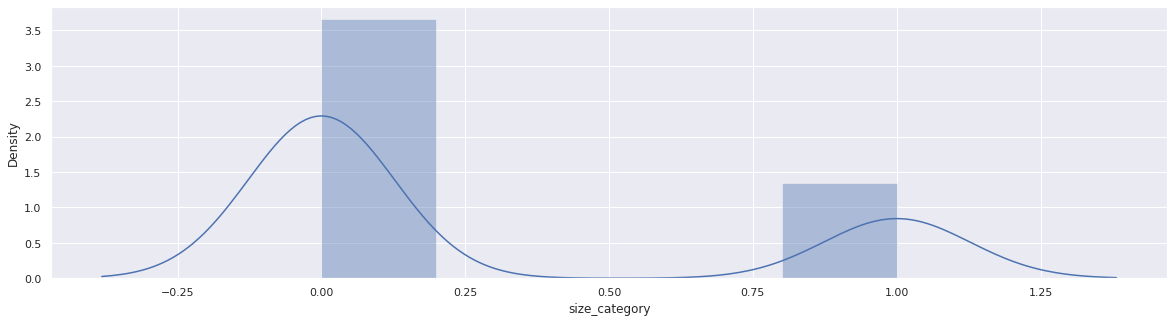

In [21]:
sns.distplot(data.size_category)

In [22]:
x = data.iloc[:,0:28]
y = data.iloc[:,28]

In [23]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [25]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.25, stratify = y)

In [26]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [29]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
# It allows approximate solutions for extremely complex problems
from sklearn.neural_network import MLPClassifier

In [31]:
mlp = MLPClassifier(hidden_layer_sizes = (10,10))

In [33]:
y_train = y_train.astype(int)
x_test = x_test.astype(int)

In [34]:
mlp.fit(np.array(x_train), np.array(y_train))

MLPClassifier(hidden_layer_sizes=(10, 10))

In [35]:
prediction_train = mlp.predict(x_train)

In [36]:
prediction_test = mlp.predict(x_test)

In [37]:
prediction_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
type(prediction_test)

numpy.ndarray

In [39]:
y_test

310    0
46     0
323    0
201    1
181    0
      ..
241    0
82     0
507    0
140    0
150    0
Name: size_category, Length: 130, dtype: object

In [40]:
pd.Series(prediction_test)

0      0
1      0
2      0
3      0
4      1
      ..
125    0
126    0
127    0
128    0
129    0
Length: 130, dtype: int64

In [44]:
type(y_test)

pandas.core.series.Series

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
np.mean(y_test == prediction_test)

0.7307692307692307

In [47]:
np.mean(y_train == prediction_train)

0.7545219638242894

Results:
By usnig density plot visualisation we idenfied the skewness of all the plots for given dataset.
In the given dataset size_category divided into small and large where we have pridicted the burned area.
Predicted the burned area of forest fires with neural networks using train & test split with accuracy of 85.78%